# Acquisition du signal ECG 

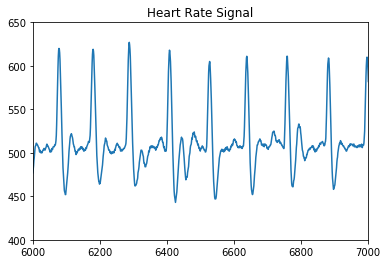

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("dataset_ecg.csv")
plt.title("Heart Rate Signal") 

plt.plot(dataset.hart)

plt.axis((6000,7000, 400, 650))

plt.show() #Display the plot

# Transformation de Fourrier 

In [30]:
w=dataset2['hart'].values.tolist()
v=w[6000:9000]

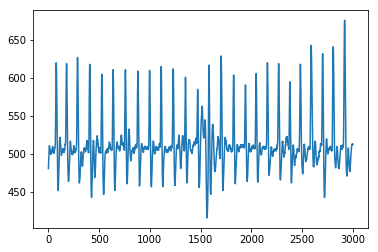

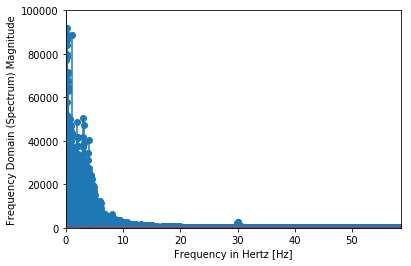

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import fftpack
from scipy import signal

plt.plot(v)

f_s =117

X = fftpack.fft(w)
freqs = fftpack.fftfreq(len(w)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, f_s / 2)
ax.set_ylim(-5, 100000)

plt.show()

# Filtrage du signal

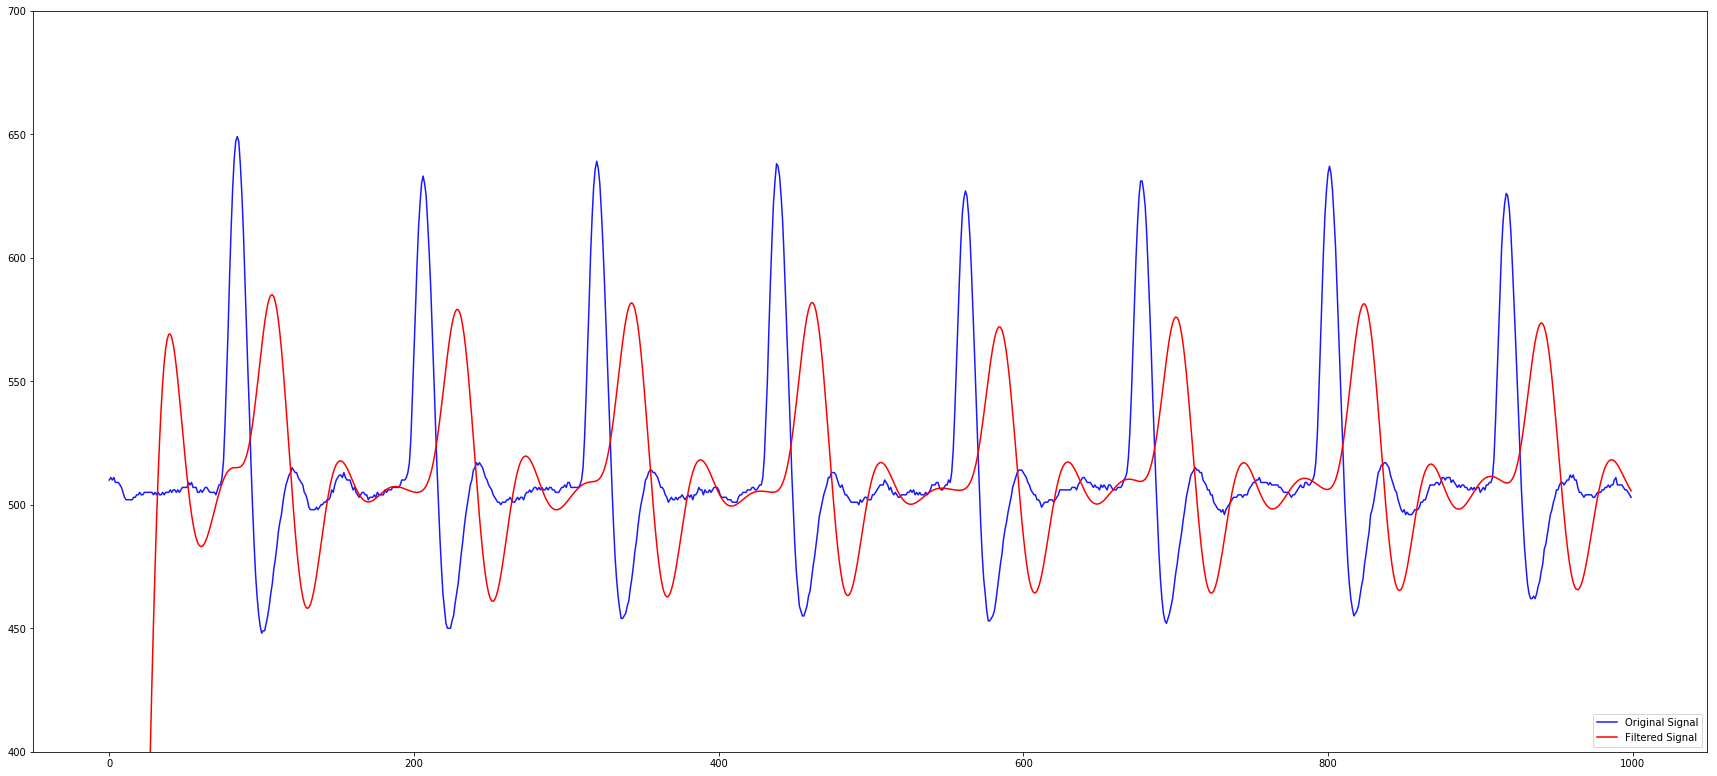

In [76]:
from scipy.signal import butter, lfilter 
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs 
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

fig= plt.figure(figsize=(30,30))

dataset = dataset[10000:11000].reset_index(drop=True) 
filtered = butter_lowpass_filter(dataset.hart, 2.5, 100.0, 5)

plt.subplot(212)
plt.plot(dataset.hart, color='Blue', alpha=0.9, label='Original Signal')
plt.legend(loc=4)
plt.subplot(212)
plt.plot(filtered, color='Red', label='Filtered Signal')
plt.ylim(400,700) 
plt.legend(loc=4)
plt.show()